# Assignment 2

Demostrate consequences of No Free Lunch Theorem: every model of machine learning makes **assumptions** about dataset properties. If the assumption fails, model perfoms badly. If the assumption is met, model perfoms good.

For each of the tasks, described below:
1. create a dataset to meet the description. For demonstration purposes, feature dimension size = 2    
1. train the models and evaluate accuracy. (with a training pipeline, described in the seminar) 
1. Show which model is better.   
1. Write what assumptions were used, and why model exibits such behavior.  
1. Plot dataset to demonstrate its properties. (Scatter plot, classes with different colors)  


Tasks:

1. Create dataset for binary classification task (binary crossentropy), 
where k-NN perfoms **worse** than logistic regression

2. Create dataset for binary classification task (binary crossentropy), 
where logistic regression perfoms **worse** than k-NN

3. Create dataset for binary classification task (binary crossentropy), 
where k-NN with cosine distance perfoms **better** than k-NN with euclidean distance


! If there is no explanation, why one model perfoms better than the other on your dataset, the task does not count.  
! if the training pipeline is not used, the task does not count.  

In [1]:
import random
import pandas as pd
import warnings
import math
import numpy as np
import matplotlib.pyplot as plt

# ML models
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import cosine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

# For creating Task 2 dataset
from sklearn.datasets import make_circles

warnings.filterwarnings('ignore')
%matplotlib inline

## Task 1. k-NN perfoms worse than logistic regression

In [2]:
#Creating dataset for task 1

x_coordinates = []
y_coordinates = []
labels = []

for number in range(1, 51, 5):
    #adding uneven datapoints
    x_coordinates.append(number + 5)
    y_coordinates.append(number * 2)
    labels.append(1)
    #adding even datapoints
    x_coordinates.append(number)
    y_coordinates.append(number * 2 + 1)
    labels.append(0)

In [3]:
#Making DataFrame
X = pd.DataFrame({'X':x_coordinates,
                  'Y':y_coordinates})
y = pd.DataFrame({'Class':labels})


In [4]:
#Splitting data into training and test datasets, preparing for cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

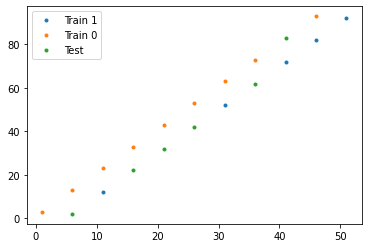

In [6]:
#Plotting data for better understanding
plt.plot(list(train.X[train.Class == 1]),
         list(train.Y[train.Class == 1]),
         '.',
         label='Train 1')
plt.plot(list(train.X[train.Class == 0]),
         list(train.Y[train.Class == 0]), 
         '.',
         label='Train 0')
plt.plot(list(test.X),
         list(test.Y), 
         '.',
         label='Test')
plt.legend()
plt.show()

In [7]:
#Using Dummy Classifier for comparison
Dummy = DummyClassifier()
Dummy.fit(X=X_train,y=y_train)
score_Dummy = np.mean(cross_val_score(Dummy, X, y, cv=5, scoring='accuracy'))
print('Mean cross-validated accuracy for dummy classifier = ' + str(score_Dummy))

Mean cross-validated accuracy for dummy classifier = 0.65


In [8]:
#Training and evaluating k-NN model
KNN = KNeighborsClassifier()
KNN.fit(X=X_train,y=y_train)
score_KNN = np.mean(cross_val_score(KNN, X, y, cv=5, scoring='accuracy'))
print('Mean cross-validated accuracy for k-NN model = ' + str(score_KNN))

Mean cross-validated accuracy for k-NN model = 0.8


In [9]:
#Training and evaluating logistic regression model
LR = LogisticRegression()
LR.fit(X=X_train,y=y_train)
score_LR = np.mean(cross_val_score(LR, X, y, cv=5, scoring='accuracy'))
print('Mean cross-validated accuracy for logistic regression model = ' + str(score_LR))

Mean cross-validated accuracy for linear regression model = 1.0


Метод k-NN основан на предположении, что объекты одного класса находятся близко друг к другу, однако можно построить такой датасет, в котором расстояние между объектами одного класса будет больше, чем расстояние между объектами разных классов, однако можно провести решающую границу — прямую, которая точно поделит все объекты на два класса. Предложенный датасет как раз соответствует такому условию: расстояние между точками (datapoints), лежащими на параллельных прямых, больше в случае точек одного класса, чем расстояние между прямыми.
Поэтому на таком датасете логистическая регрессия показывает идеальную точность, а алгоритм k-NN работает хуже. Если увеличит разницу в расстояниях, то результаты работы алгоритма k-NN будут ещё хуже.
Оба алгоритма при этом преодолели «бейзлайн» DummyClassifier.

## Task 2. Logistic regression perfoms worse than k-NN

In [10]:
#Creating dataset for task 2
X, y = make_circles(n_samples=100, noise=0.15, factor=0.1)

In [11]:
#Making DataFrame
X = pd.DataFrame(X)
y = pd.DataFrame({'Target':y})

In [12]:
#Splitting data into training and test datasets, preparing for cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

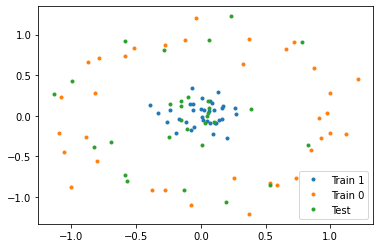

In [14]:
#Plotting data for better understanding
plt.plot(list(train[0][train.Target == 1]),
         list(train[1][train.Target == 1]),
         '.',
         label='Train 1')
plt.plot(list(train[0][train.Target == 0]),
         list(train[1][train.Target == 0]), 
         '.',
         label='Train 0')
plt.plot(list(test[0]),
         list(test[1]), 
         '.',
         label='Test')
plt.legend()
plt.show()

In [15]:
#Using Dummy Classifier for comparison
Dummy = DummyClassifier()
Dummy.fit(X=X_train,y=y_train)
score_Dummy = np.mean(cross_val_score(Dummy, X, y, cv=5, scoring='accuracy'))
print('Mean cross-validated accuracy for dummy classifier = ' + str(score_Dummy))

Mean cross-validated accuracy for dummy classifier = 0.54


In [16]:
#Training and evaluating k-NN model
KNN = KNeighborsClassifier()
KNN.fit(X=X_train,y=y_train)
score_KNN = np.mean(cross_val_score(KNN, X, y, cv=5, scoring='accuracy'))
print('Mean cross-validated accuracy for k-NN model = ' + str(score_KNN))

Mean cross-validated accuracy for k-NN model = 1.0


In [17]:
#Training and evaluating logistic regression model
LR = LogisticRegression()
LR.fit(X=X_train,y=y_train)
score_LR = np.mean(cross_val_score(LR, X, y, cv=5, scoring='accuracy'))
print('Mean cross-validated accuracy for logistic regression model = ' + str(score_LR))

Mean cross-validated accuracy for linear regression model = 0.43999999999999995


Для выполнения этого задания подходит любой датасет, в котором невозможно провести решающую границу так, чтобы она была прямой, то есть нужны данные, в которых нет линейной закономерности распределения, однако есть довольно плотный кластер расположенных рядом datapoints.
Можно воспользоваться методом sklearn.datasets.make_circles, который позволяет создать как раз такой датасет: точки одного класса расположены плотным небольшим кругом, а точки другого класса — распределены по большей окружности вне этого кластера точек первого класса.
Можно заметить, что на таких данных точность линейной модели — на уровне DummyClassifier, то есть не слишком отличается от случайного присвоения классов. Точность модели k-NN, напротив, близка к абсолютной. Чем более «скученной» мы будем делать группу точек в маленьком круге внутри, тем лучше себя покажет k-NN модель.

### Task 3. k-NN with cosine similarity perfoms better than k-NN with euclidean distance

Для демонстрации различий в этих метриках подойдёт датасет, который был представлен в первом задании. Повторим его создание.

In [18]:
#Repeating dataset making process from task 1

X = pd.DataFrame({'X':x_coordinates,
                  'Y':y_coordinates})
y = pd.DataFrame({'Class':labels})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [19]:
#Training and evaluating k-NN model based on euclidian distance
KNN_euclidean = KNeighborsClassifier(metric='euclidean')
KNN_euclidean.fit(X=X_train,y=y_train)
score_KNN_euclidean = np.mean(cross_val_score(KNN_euclidean, X, y, cv=5, scoring='accuracy'))
print('Mean cross-validated accuracy for k-NN model based on euclidean distance = ' + str(score_KNN_euclidean))

Mean cross-validated accuracy for k-NN model based on euclidean distance = 0.8


In [20]:
#Training and evaluating k-NN model based on cosine similarity
KNN_cosine = KNeighborsClassifier(metric=cosine)
KNN_cosine.fit(X=X_train,y=y_train)
score_KNN_cosine = np.mean(cross_val_score(KNN_cosine, X, y, cv=5, scoring='accuracy'))
print('Mean cross-validated accuracy for k-NN model based on cosine similarity = ' + str(score_KNN_cosine))

Mean cross-validated accuracy for k-NN model based on cosine similarity = 1.0


Разница в точности метрик создаётся за счёт того же эффекта, что и в первом задании: евклидово расстояние между точками одного класса «даёт сбой», поскольку оно больше, чем расстояние между точками разных классов, однако косинусная близость в условиях такого датасета гораздо более информативна, ведь все точки одного класса лежат на одной прямой.